In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import json
import datetime
import tldextract
import re
import seaborn as sns

In [2]:
#!pip install tldextract

In [3]:
zf = zipfile.ZipFile(r'C:\Users\nishantjairath\Downloads\takeout-20211110T134707Z-001.zip')

In [4]:
zf.namelist()

['Takeout/Chrome/BrowserHistory.json', 'Takeout/archive_browser.html']

In [5]:
import os
os. getcwd()

'C:\\Users\\nishantjairath'

In [6]:
from zipfile import ZipFile

with ZipFile(r'C:\Users\nishantjairath\Downloads\takeout-20211110T134707Z-001.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(r'C:\Users\nishantjairath\Downloads')

In [7]:
with open(r'C:\Users\nishantjairath\Downloads\Takeout\Chrome\BrowserHistory.json', encoding='utf-8', errors='ignore') as json_data:
     data = json.load(json_data, strict=False)

In [8]:
data

{'Browser History': [{'favicon_url': 'https://www.google.com/favicon.ico',
   'page_transition': 'LINK',
   'title': 'Google Takeout',
   'url': 'https://takeout.google.com/settings/takeout?pli=1',
   'client_id': '6OaB7Y+65YWevbO9GzzuPw==',
   'time_usec': 1636552003919630},
  {'favicon_url': 'https://www.google.com/favicon.ico',
   'page_transition': 'LINK',
   'title': 'Google Takeout',
   'url': 'https://takeout.google.com/settings/takeout?pli=1',
   'client_id': '6OaB7Y+65YWevbO9GzzuPw==',
   'time_usec': 1636551993834277},
  {'favicon_url': 'https://www.google.com/favicon.ico',
   'page_transition': 'LINK',
   'title': 'Google Takeout',
   'url': 'https://takeout.google.com/settings/takeout?pli=1',
   'client_id': '6OaB7Y+65YWevbO9GzzuPw==',
   'time_usec': 1636551767926562},
  {'favicon_url': 'https://www.google.com/favicon.ico',
   'page_transition': 'GENERATED',
   'title': 'google takeout - Google Search',
   'url': 'https://www.google.com/search?q=google+takeout&rlz=1C1CHBF_

In [9]:
dataframe = pd.DataFrame.from_dict(data['Browser History'])

In [10]:
dataframe

,favicon_url,page_transition,title,url,client_id,time_usec
0,https://www.google.com/favicon.ico,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,6OaB7Y+65YWevbO9GzzuPw==,1636552003919630
1,https://www.google.com/favicon.ico,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,6OaB7Y+65YWevbO9GzzuPw==,1636551993834277
2,https://www.google.com/favicon.ico,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,6OaB7Y+65YWevbO9GzzuPw==,1636551767926562
3,https://www.google.com/favicon.ico,GENERATED,google takeout - Google Search,https://www.google.com/search?q=google+takeout...,6OaB7Y+65YWevbO9GzzuPw==,1636551763381167
4,https://ssl.gstatic.com/ui/v1/icons/mail/rfr/g...,LINK,Inbox (157) - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox,6OaB7Y+65YWevbO9GzzuPw==,1636551744660067
...,...,...,...,...,...,...
13323,NaN,LINK,Z1 Media - Senior Product Manager,https://jobs.lever.co/z1media/9866edf5-ee21-44...,9+qxbfSrtc2TPHplu2gcSA==,1605084747326943
13324,NaN,RELOAD,Online Shopping site in India: Shop Online for...,https://www.amazon.in/ref=navm_hdr_logo,9+qxbfSrtc2TPHplu2gcSA==,1605030107447109
13325,NaN,LINK,Buy Globus Mustard Regular Fit Cardigan for Wo...,https://www.tatacliq.com/globus-mustard-regula...,9+qxbfSrtc2TPHplu2gcSA==,1605030095712659
13326,NaN,LINK,CutShort: Making Top Professionals More Succes...,https://cutshort.io/profile/candidate-conversa...,9+qxbfSrtc2TPHplu2gcSA==,1605016681603916


In [11]:
dataframe.drop(['client_id', 'favicon_url'], axis =1, inplace = True)

In [12]:
dataframe.head(5)

,page_transition,title,url,time_usec
0,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636552003919630
1,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636551993834277
2,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636551767926562
3,GENERATED,google takeout - Google Search,https://www.google.com/search?q=google+takeout...,1636551763381167
4,LINK,Inbox (157) - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox,1636551744660067


In [13]:
#page_transition: Contains info on the type of page open like reload, type & enter, link open etc. 
#I was satisfied by filtering only on LINK and TYPED

In [14]:
dataframe['page_transition'].unique()

array(['LINK', 'GENERATED', 'AUTO_BOOKMARK', 'TYPED', 'AUTO_TOPLEVEL',
       'RELOAD', 'FORM_SUBMIT'], dtype=object)

In [15]:
dataframe = dataframe[(dataframe['page_transition'] == 'LINK') |(dataframe['page_transition'] == 'TYPED')]

In [16]:
dataframe.shape

(9847, 4)

In [17]:
#To start off, I needed to break the time (in microseconds) to human-readable datetime format. 
#Then I needed to derive features from it like hour, day, month, or day_of_week.

In [18]:
def convert_time(x):
    return datetime.datetime.fromtimestamp(x/1000000)

In [19]:
dataframe['dt'] =dataframe['time_usec'].apply(convert_time)

<ipython-input-19-2ab5e1207b61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['dt'] =dataframe['time_usec'].apply(convert_time)


In [20]:
dataframe.head(10)

,page_transition,title,url,time_usec,dt
0,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636552003919630,2021-11-10 19:16:43.919630
1,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636551993834277,2021-11-10 19:16:33.834277
2,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636551767926562,2021-11-10 19:12:47.926562
4,LINK,Inbox (157) - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox,1636551744660067,2021-11-10 19:12:24.660067
5,LINK,Resume - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox/FMfcgz...,1636551737377333,2021-11-10 19:12:17.377333
6,LINK,Resume - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox/FMfcgz...,1636551703014140,2021-11-10 19:11:43.014140
7,LINK,Resume - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox/FMfcgz...,1636551637857490,2021-11-10 19:10:37.857490
9,TYPED,New Tab,chrome://newtab/,1636551629560017,2021-11-10 19:10:29.560017
10,LINK,Google Account,https://myaccount.google.com/data-and-personal...,1636551624071997,2021-11-10 19:10:24.071997
11,LINK,Google Takeout,https://takeout.google.com/,1636551613321630,2021-11-10 19:10:13.321630


In [21]:
def get_domain(x):
    domain = tldextract.extract(x)[1]
    sub_domain = tldextract.extract(x)[0]
    if sub_domain == 'mail':
        return sub_domain+'.'+domain
    
    if domain == 'google' and sub_domain =='www':
        return 'google_search'
    return domain

In [22]:
dataframe['domain'] = dataframe['url'].apply(get_domain)

<ipython-input-22-92ecdbc865cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['domain'] = dataframe['url'].apply(get_domain)


In [23]:
dataframe.head(10)

,page_transition,title,url,time_usec,dt,domain
0,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636552003919630,2021-11-10 19:16:43.919630,google
1,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636551993834277,2021-11-10 19:16:33.834277,google
2,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636551767926562,2021-11-10 19:12:47.926562,google
4,LINK,Inbox (157) - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox,1636551744660067,2021-11-10 19:12:24.660067,mail.google
5,LINK,Resume - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox/FMfcgz...,1636551737377333,2021-11-10 19:12:17.377333,mail.google
6,LINK,Resume - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox/FMfcgz...,1636551703014140,2021-11-10 19:11:43.014140,mail.google
7,LINK,Resume - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox/FMfcgz...,1636551637857490,2021-11-10 19:10:37.857490,mail.google
9,TYPED,New Tab,chrome://newtab/,1636551629560017,2021-11-10 19:10:29.560017,newtab
10,LINK,Google Account,https://myaccount.google.com/data-and-personal...,1636551624071997,2021-11-10 19:10:24.071997,google
11,LINK,Google Takeout,https://takeout.google.com/,1636551613321630,2021-11-10 19:10:13.321630,google


In [24]:
#extrapolated the domain information to group well known domains into one or the other categories(buckets) 

In [25]:
domain_unique = dataframe['domain'].value_counts()

In [26]:
domain_unique.head(50)

twitter           1593
amazon            1060
mail.google        804
e-gmat             594
linkedin           527
newtab             428
cowin              328
google             264
hotstar            163
microsoft          143
ampproject         141
google_search      132
dominos            114
naukri              99
youtube             87
mba                 86
carwale             65
zee5                63
artofmanliness      59
zoom                56
bookmyhsrp          56
myworkdayjobs       52
hdfcbank            52
tripadvisor         51
indiamart           50
iimjobs             49
parivahan           49
gmatclub            47
w3schools           44
kaggle              42
live                41
ecompanystore       40
shortlist           39
pharmeasy           38
shl                 38
housing             38
udemy               37
1mg                 37
sprinklr            37
petermcgraw         36
oxygentimes         34
xtits               34
instahyre           31
practo     

In [27]:
def get_category(x):
    if x in ['udemy', 'kaggle', 'w3schools', 'gmatclub', 'iimjobs', 'naukri', 'e-gmat']:
        return "Learning"
    elif x in ['twitter', 'linkedin', 'youtube', 'hotstar', 'zee5']:
        return "Entertainment"
    elif x in ['amazon', 'flipkart', 'dominos']:
        return "Shopping"
    else:
        return "Other"



In [28]:
dataframe['category'] = dataframe['domain'].apply(get_category)

<ipython-input-28-07c4f6f275eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['category'] = dataframe['domain'].apply(get_category)


In [29]:
dataframe['category'].unique()

array(['Other', 'Entertainment', 'Learning', 'Shopping'], dtype=object)

In [30]:
dataframe.columns

Index(['page_transition', 'title', 'url', 'time_usec', 'dt', 'domain',
       'category'],
      dtype='object')

In [31]:
dataframe['Date_col'] =  dataframe['dt'].dt.date

<ipython-input-31-e70c3855d43b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Date_col'] =  dataframe['dt'].dt.date


In [32]:
dataframe['Time_col'] =  dataframe['dt'].dt.strftime('%H:%M')

<ipython-input-32-6bca5a081dd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Time_col'] =  dataframe['dt'].dt.strftime('%H:%M')


In [33]:
dataframe['weekday'] =  dataframe['dt'].dt.day_name()

<ipython-input-33-f04819cd33f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['weekday'] =  dataframe['dt'].dt.day_name()


In [34]:
dataframe.head()

,page_transition,title,url,time_usec,dt,domain,category,Date_col,Time_col,weekday
0,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636552003919630,2021-11-10 19:16:43.919630,google,Other,2021-11-10,19:16,Wednesday
1,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636551993834277,2021-11-10 19:16:33.834277,google,Other,2021-11-10,19:16,Wednesday
2,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636551767926562,2021-11-10 19:12:47.926562,google,Other,2021-11-10,19:12,Wednesday
4,LINK,Inbox (157) - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox,1636551744660067,2021-11-10 19:12:24.660067,mail.google,Other,2021-11-10,19:12,Wednesday
5,LINK,Resume - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox/FMfcgz...,1636551737377333,2021-11-10 19:12:17.377333,mail.google,Other,2021-11-10,19:12,Wednesday


In [35]:
def urls_security(urls):
    if urls.split(':')[0] == 'https':
        return 'Yes'
    elif urls.split(':')[0] == 'chrome':
        return 'Yes'
    return 'No'
    

In [36]:
dataframe['is_secure'] = dataframe['url'].apply(urls_security)

<ipython-input-36-1498ac9f8951>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['is_secure'] = dataframe['url'].apply(urls_security)


In [37]:
dataframe['is_secure'].unique()

array(['Yes', 'No'], dtype=object)

In [38]:
def weekend_flag(x):
    if (x == 'Sunday'):
        return 'Yes'
    elif x == 'Saturday':
        return 'Yes'
    return 'No'

In [39]:
dataframe['is_weekend'] = dataframe['weekday'].apply(weekend_flag)

<ipython-input-39-2cc60cf0694c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['is_weekend'] = dataframe['weekday'].apply(weekend_flag)


In [54]:
dataframe[dataframe['weekday']=='Friday']

,page_transition,title,url,time_usec,dt,domain,category,Date_col,Time_col,weekday,is_secure,is_weekend,month,hour
245,LINK,Twitter,https://mobile.twitter.com/ResurrectedLuck/sta...,1636095642681926,2021-11-05 12:30:42.681926,twitter,Entertainment,2021-11-05,12:30,Friday,Yes,No,11,12
247,LINK,Twitter,https://mobile.twitter.com/LeaMaric/status/145...,1636095613674460,2021-11-05 12:30:13.674460,twitter,Entertainment,2021-11-05,12:30,Friday,Yes,No,11,12
249,LINK,Twitter,https://mobile.twitter.com/realPhoenixFire/sta...,1636095588203659,2021-11-05 12:29:48.203659,twitter,Entertainment,2021-11-05,12:29,Friday,Yes,No,11,12
251,LINK,Twitter,https://mobile.twitter.com/Asato019/status/145...,1636095551716573,2021-11-05 12:29:11.716573,twitter,Entertainment,2021-11-05,12:29,Friday,Yes,No,11,12
253,LINK,Twitter,https://mobile.twitter.com/boardroom/status/14...,1636095530758750,2021-11-05 12:28:50.758750,twitter,Entertainment,2021-11-05,12:28,Friday,Yes,No,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,LINK,Home / Twitter,https://mobile.twitter.com/home,1605238243014579,2020-11-13 09:00:43.014579,twitter,Entertainment,2020-11-13,09:00,Friday,Yes,No,11,9
13313,LINK,Twitter,https://mobile.twitter.com/artofmanliness/stat...,1605238232453033,2020-11-13 09:00:32.453033,twitter,Entertainment,2020-11-13,09:00,Friday,Yes,No,11,9
13314,LINK,"Terry Laughlin, The Master Who Changed My Life...",https://tim.blog/2017/10/29/terry-laughlin/amp...,1605238093727562,2020-11-13 08:58:13.727562,tim,Other,2020-11-13,08:58,Friday,Yes,No,11,8
13315,LINK,Home / Twitter,https://mobile.twitter.com/home,1605238038974229,2020-11-13 08:57:18.974229,twitter,Entertainment,2020-11-13,08:57,Friday,Yes,No,11,8


In [41]:
dataframe['month'] = dataframe['dt'].dt.month

<ipython-input-41-2ff2a6edf5ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['month'] = dataframe['dt'].dt.month


In [42]:
dataframe['hour']= dataframe['dt'].dt.hour

<ipython-input-42-633438822394>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['hour']= dataframe['dt'].dt.hour


In [43]:
dataframe.head(10)

,page_transition,title,url,time_usec,dt,domain,category,Date_col,Time_col,weekday,is_secure,is_weekend,month,hour
0,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636552003919630,2021-11-10 19:16:43.919630,google,Other,2021-11-10,19:16,Wednesday,Yes,No,11,19
1,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636551993834277,2021-11-10 19:16:33.834277,google,Other,2021-11-10,19:16,Wednesday,Yes,No,11,19
2,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636551767926562,2021-11-10 19:12:47.926562,google,Other,2021-11-10,19:12,Wednesday,Yes,No,11,19
4,LINK,Inbox (157) - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox,1636551744660067,2021-11-10 19:12:24.660067,mail.google,Other,2021-11-10,19:12,Wednesday,Yes,No,11,19
5,LINK,Resume - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox/FMfcgz...,1636551737377333,2021-11-10 19:12:17.377333,mail.google,Other,2021-11-10,19:12,Wednesday,Yes,No,11,19
6,LINK,Resume - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox/FMfcgz...,1636551703014140,2021-11-10 19:11:43.014140,mail.google,Other,2021-11-10,19:11,Wednesday,Yes,No,11,19
7,LINK,Resume - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox/FMfcgz...,1636551637857490,2021-11-10 19:10:37.857490,mail.google,Other,2021-11-10,19:10,Wednesday,Yes,No,11,19
9,TYPED,New Tab,chrome://newtab/,1636551629560017,2021-11-10 19:10:29.560017,newtab,Other,2021-11-10,19:10,Wednesday,Yes,No,11,19
10,LINK,Google Account,https://myaccount.google.com/data-and-personal...,1636551624071997,2021-11-10 19:10:24.071997,google,Other,2021-11-10,19:10,Wednesday,Yes,No,11,19
11,LINK,Google Takeout,https://takeout.google.com/,1636551613321630,2021-11-10 19:10:13.321630,google,Other,2021-11-10,19:10,Wednesday,Yes,No,11,19


Exploring data and creating visualizations

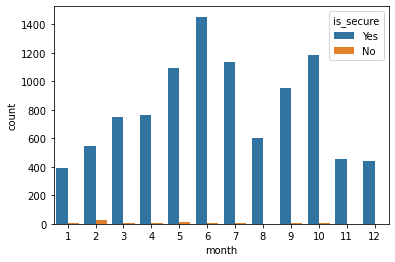

In [44]:
#Secure vs Insecure usage:

sns.countplot(x="month", hue="is_secure", data=dataframe);

In [45]:
(dataframe[dataframe["is_secure"] == "No"].url.unique())

array(['http://localhost:8888/notebooks/Practice%20-%20Udemy%20course%20-%20ML.ipynb',
       'http://localhost:8888/notebooks/Untitled.ipynb?kernel_name=python3',
       'http://localhost:8888/tree', 'http://dtu.ac.in/',
       'http://www.differencebetween.net/miscellaneous/politics/difference-between-ib-and-raw/',
       'http://www.differencebetween.net/miscellaneous/politics/difference-between-ib-and-raw/#:~:text=IB%20and%20RAW%20are%20the,is%20the%20oldest%20intelligence%20agency.',
       'http://www.wildlifeinsight.com/how-to-rear-caterpillars/',
       'http://api.wakefit.co/survey/process/MjIxMTg0MDAyNzUzMDc0/',
       'http://paulgraham.com/hwh.html',
       'http://careers.edgeindia.com/job-details.php?req_id=1934',
       'http://iporntv.net/search/sunny+leone+tommy+gunn',
       'http://www.paulgraham.com/vb.html',
       'http://url4167.jamboreeeducation.com/asm/?user_id=2682752&data=Q_5qNAeSZ8ogs4Hjg2ILd1UAHfOZYHjp-qTg70lu5pC6ZJmqAjwTLhQLA3Jc3Ykr2Ka7LVSjtm2B-WbNKa2kCnQm

In [46]:
dataframe["is_weekend"].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='hour', ylabel='count'>

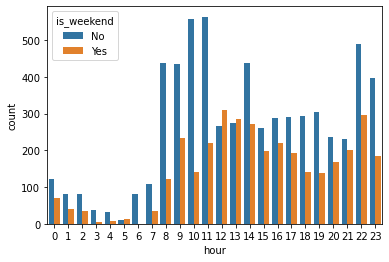

In [47]:
#Weekday vs Weekend browser usage:


#sns.countplot(x="Time_col", hue="is_weekend", data=dataframe)
sns.countplot(x=dataframe["hour"], hue=dataframe["is_weekend"])

In [48]:
dataframe.head(5)

,page_transition,title,url,time_usec,dt,domain,category,Date_col,Time_col,weekday,is_secure,is_weekend,month,hour
0,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636552003919630,2021-11-10 19:16:43.919630,google,Other,2021-11-10,19:16,Wednesday,Yes,No,11,19
1,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636551993834277,2021-11-10 19:16:33.834277,google,Other,2021-11-10,19:16,Wednesday,Yes,No,11,19
2,LINK,Google Takeout,https://takeout.google.com/settings/takeout?pli=1,1636551767926562,2021-11-10 19:12:47.926562,google,Other,2021-11-10,19:12,Wednesday,Yes,No,11,19
4,LINK,Inbox (157) - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox,1636551744660067,2021-11-10 19:12:24.660067,mail.google,Other,2021-11-10,19:12,Wednesday,Yes,No,11,19
5,LINK,Resume - jairath.nishant@gmail.com - Gmail,https://mail.google.com/mail/u/0/#inbox/FMfcgz...,1636551737377333,2021-11-10 19:12:17.377333,mail.google,Other,2021-11-10,19:12,Wednesday,Yes,No,11,19


In [213]:
#looking at urls where domain = youtube
youtube = dataframe[dataframe['domain']=='youtube'].value_counts()
youtube.reset_index()


,page_transition,title,url,time_usec,dt,domain,category,Date_col,Time_col,weekday,is_secure,is_weekend,month,hour,0
0,LINK,"#ProductCon: Panel Discussion by Uber, Discove...",https://www.youtube.com/watch?v=LTIPc2qolkI,1630833367981198,2021-09-05 14:46:07.981198,youtube,Entertainment,2021-09-05,14:46,Sunday,Yes,Yes,9,14,1
1,LINK,YouTube,https://www.youtube.com/,1627192475057796,2021-07-25 11:24:35.057796,youtube,Entertainment,2021-07-25,11:24,Sunday,Yes,Yes,7,11,1
2,LINK,product requirements document - YouTube,https://www.youtube.com/results?search_query=p...,1630593838345418,2021-09-02 20:13:58.345418,youtube,Entertainment,2021-09-02,20:13,Thursday,Yes,No,9,20,1
3,LINK,mvp - YouTube,https://www.youtube.com/results?search_query=mvp,1630761280211081,2021-09-04 18:44:40.211081,youtube,Entertainment,2021-09-04,18:44,Saturday,Yes,Yes,9,18,1
4,LINK,kathak dance - YouTube,https://www.youtube.com/results?search_query=k...,1623485906550076,2021-06-12 13:48:26.550076,youtube,Entertainment,2021-06-12,13:48,Saturday,Yes,Yes,6,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,LINK,Kathak Tutorial- Lesson 2 - YouTube,https://www.youtube.com/watch?v=8a0ZlYZ0eXw&li...,1623486507301966,2021-06-12 13:58:27.301966,youtube,Entertainment,2021-06-12,13:58,Saturday,Yes,Yes,6,13,1
83,LINK,Kathak Tutorial- Lesson 2 - YouTube,https://www.youtube.com/watch?v=8a0ZlYZ0eXw,1623486205463045,2021-06-12 13:53:25.463045,youtube,Entertainment,2021-06-12,13:53,Saturday,Yes,Yes,6,13,1
84,LINK,Kathak Tutorial- Lesson 1 - YouTube,https://www.youtube.com/watch?v=EcvPBRM405k,1623486023924346,2021-06-12 13:50:23.924346,youtube,Entertainment,2021-06-12,13:50,Saturday,Yes,Yes,6,13,1
85,LINK,"Kalank Title Track - Lyrical | Alia Bhatt , Va...",https://www.youtube.com/watch?v=Grr0FlC8SQA&li...,1622989769736419,2021-06-06 19:59:29.736419,youtube,Entertainment,2021-06-06,19:59,Sunday,Yes,Yes,6,19,1


In [215]:
youtube.to_csv(r'C:\Users\nishantjairath\Downloads\youtube.csv')

In [49]:
df_new = dataframe.groupby(['hour', 'weekday'])["domain"].size()

In [50]:
df_new.reset_index(name = 'count')
df_new.head(5)

hour  weekday 
0     Friday       6
      Monday      27
      Saturday    50
      Sunday      21
      Thursday    44
Name: domain, dtype: int64

<AxesSubplot:xlabel='weekday', ylabel='hour'>

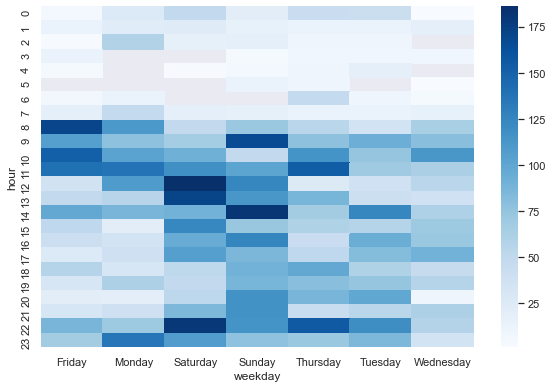

In [51]:
#Heatmap

sns.set(rc={'figure.figsize':(9.7,6.27)})

sns.heatmap(df_new.unstack(), annot = False, cmap = 'Blues')

In [118]:
df_new = dataframe.groupby(['category', 'weekday']).size()

In [121]:
df_new = df_new.reset_index(name = 'count')

In [125]:
df_new = df_new.sort_values('weekday')

C:\Users\nishantjairath\Anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


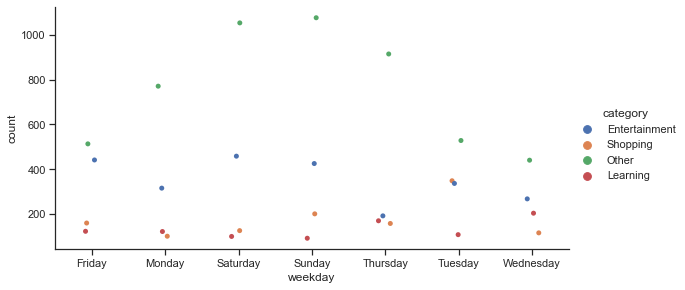

In [139]:
#catplot

sns.set_theme(style = 'ticks')

#sns.set(rc={'figure.figsize':(9.7,10.27)})

g = sns.catplot(x = 'weekday', y  = 'count', hue = 'category', data = df_new,size =4, aspect =2)

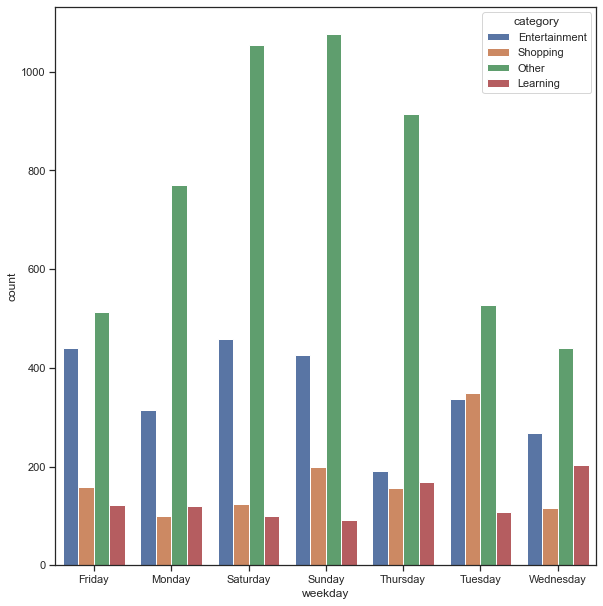

In [138]:
g = sns.barplot(x = 'weekday', y  = 'count', hue = 'category', data = df_new)

In [168]:
#Checking index before filtering data on Date_col
for values in dataframe.index:
    print(values)

0
1
2
4
5
6
7
9
10
11
12
13
15
17
18
19
22
23
25
29
30
31
32
33
34
35
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
60
61
62
63
64
65
66
67
68
69
70
71
72
73
75
77
78
79
82
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
150
152
154
156
158
160
162
164
166
168
170
172
175
176
177
178
179
180
181
184
186
187
188
189
190
191
192
193
195
196
197
198
199
200
201
202
203
204
206
208
209
211
213
215
217
218
220
222
224
226
227
228
229
231
233
235
237
239
240
245
247
249
251
253
255
257
259
261
263
265
267
269
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
293
294
295
298
299
300
301
302
303
304
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
332
333
334
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
355
357
3

2639
2640
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2656
2659
2661
2663
2665
2667
2668
2669
2670
2672
2673
2674
2675
2676
2677
2681
2683
2685
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2700
2701
2704
2706
2708
2710
2712
2714
2716
2718
2720
2721
2724
2727
2728
2730
2732
2734
2736
2738
2740
2741
2742
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2761
2762
2763
2765
2767
2769
2770
2772
2774
2778
2780
2782
2784
2786
2788
2790
2791
2792
2795
2796
2797
2798
2799
2801
2802
2803
2804
2805
2807
2808
2810
2811
2812
2813
2815
2816
2817
2819
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2834
2835
2836
2837
2838
2839
2842
2843
2844
2846
2847
2848
2850
2851
2852
2854
2855
2856
2857
2858
2859
2860
2862
2865
2867
2868
2870
2872
2874
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2917
2918
2920


5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5281
5282
5283
5284
5285
5286
5287
5288
5289
5292
5293
5294
5297
5300
5301
5303
5304
5305
5306
5307
5308
5310
5311
5313
5314
5316
5317
5319
5320
5322
5323
5325
5326
5328
5340
5342
5344
5345
5347
5348
5350
5351
5353
5354
5355
5356
5358
5360
5361
5363
5364
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5379
5380
5381
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5418
5420
5421
5423
5424
5425
5426
5429
5431
5432
5433
5434
5436
5437
5438
5441
5443
5444
5445
5446
5447
5448
5449
5450
5453
5455
5456
5457
5458
5459
5460
5463
5464
5465
5466
5467
5469
5470
5471
5472
5473
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5487
5488
5489
5490
5491
5493
5495
5496
5497
5501
5503
5504
5505
5506
5507
5508
5509
5510
5511
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531


7539
7540
7541
7543
7544
7549
7550
7551
7552
7553
7554
7555
7556
7558
7559
7560
7562
7563
7564
7565
7566
7567
7568
7571
7575
7576
7577
7578
7579
7580
7583
7587
7588
7589
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7607
7611
7612
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7636
7637
7638
7639
7640
7641
7642
7643
7644
7645
7646
7647
7648
7649
7650
7651
7652
7653
7654
7655
7656
7657
7658
7659
7660
7661
7662
7663
7664
7665
7666
7667
7668
7669
7670
7671
7672
7673
7674
7675
7676
7677
7681
7682
7683
7686
7687
7688
7689
7690
7691
7692
7693
7694
7695
7696
7697
7698
7699
7700
7701
7702
7703
7704
7705
7706
7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7728
7731
7732
7733
7734
7735
7736
7738
7740
7741
7742
7743
7744
7747
7749
7752
7753
7754
7755
7756
7757
7758
7759
7760
7761
7762
7763
7764
7766
7767
7768
7769
7770
7771
7772
7774
7778
7780
7781
7782
7783
7787
7789
7790
7791
7793
7796
7798


10188
10189
10190
10191
10192
10195
10198
10199
10204
10205
10206
10208
10211
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10226
10227
10228
10229
10230
10231
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10263
10265
10267
10270
10273
10275
10278
10279
10280
10281
10282
10283
10284
10285
10289
10290
10294
10295
10296
10297
10298
10299
10300
10303
10305
10310
10313
10315
10316
10317
10318
10319
10321
10322
10323
10324
10328
10329
10330
10332
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10353
10355
10357
10359
10360
10362
10364
10365
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10406
10407
10408
10409
10410
10411
1041

12669
12670
12673
12677
12679
12680
12681
12682
12683
12684
12685
12686
12687
12688
12689
12690
12692
12693
12698
12699
12700
12701
12702
12703
12704
12705
12707
12708
12709
12710
12713
12714
12715
12717
12718
12719
12720
12721
12722
12723
12724
12725
12727
12728
12729
12730
12731
12732
12733
12734
12735
12736
12738
12739
12740
12741
12742
12743
12744
12745
12746
12748
12749
12750
12751
12752
12754
12755
12756
12757
12758
12760
12761
12762
12763
12764
12765
12766
12767
12768
12769
12780
12781
12782
12783
12784
12785
12792
12794
12797
12798
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12811
12812
12813
12814
12815
12817
12822
12823
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12838
12841
12842
12843
12844
12845
12846
12847
12848
12852
12859
12863
12864
12865
12867
12869
12871
12872
12873
12874
12875
12878
12880
12881
12882
12883
12884
12885
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
1290

In [218]:
#df_new = dataframe.set_index('Date_col')
df_new = dataframe

In [219]:
#df_new = df_new.loc[datetime.date(year=2021,month=1,day=1):datetime.date(year=2021,month=12,day=31)]

df_new =df_new[(df_new['Date_col']>pd.Timestamp(2021,1,1)) & (df_new['Date_col']<pd.Timestamp(2021,12,31))]

In [220]:
df_new['dt'].dt.strftime('%y').unique().tolist()

['21']

In [221]:
df_new = df_new.groupby([ 'month', 'category']).size()

In [222]:
df_new = df_new.reset_index(name = 'count')

In [223]:
df_new.head()

,month,category,count
0,1,Entertainment,59
1,1,Learning,24
2,1,Other,216
3,1,Shopping,99
4,2,Entertainment,122


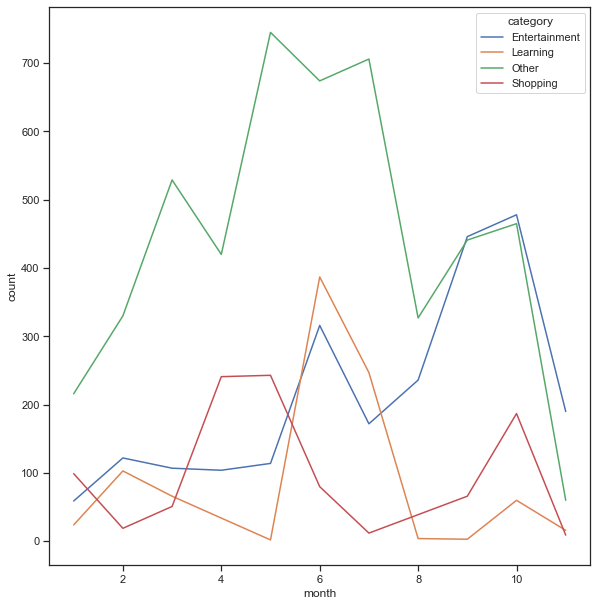

In [224]:
g = sns.lineplot(data = df_new, x = 'month' , y = 'count' ,hue = 'category')

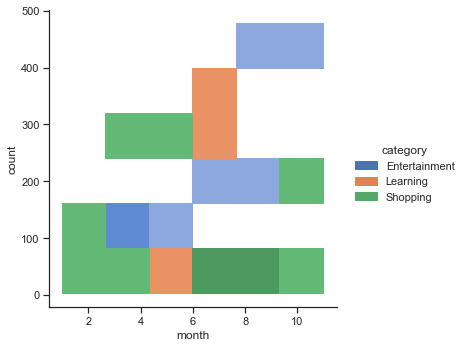

In [234]:
exclude = ['Other']

sns.displot(df_new[df_new.category != 'Other'], x="month", y = "count", hue="category", )